In [ ]:
  # Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1izAYScZGiWfis_xXRoGwqgFlhCsPeu5R' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('tweet_data.csv', lineterminator='\n')
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Performing VADER Sentiment Analysis
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['VScore'] = df['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['VComp'] = df['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Ngrams Analysis



In [ ]:
import networkx as nx
import itertools, collections
from nltk import bigrams
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid19', 'covid','vaccine', 'covid-19', '19', 'vaccines', 'vaccine.','vaccine?', '-', '.']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Check d[0].items() for understanding more about graph plot

def BigramsAnalysis(sentiment):
  l_words = df[df["Sentiment"]==sentiment]["Clean Text"].tolist()
  words_in_tweet = [tweet.split() for tweet in l_words]
  words_lemmatized = [[word for word in tweet_words]
              for tweet_words in words_in_tweet]
  tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_lemmatized]
  terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw if tweet]
  bigrams_list = list(itertools.chain(*terms_bigram))
  bigram_counts = collections.Counter(bigrams_list)
  bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])
  d = bigram_df.set_index('bigram').T.to_dict('records')
  G = nx.Graph()
  for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v))
  fig, ax = plt.subplots(figsize=(14, 10))

  pos = nx.spring_layout(G, k=2)

  # Plot networks
  nx.draw_networkx(G, pos,
                  font_size=16,
                  width=3,
                  edge_color='grey',
                  node_color='purple',
                  with_labels = False,
                  ax=ax)

  # Create offset labels
  for key, value in pos.items():
      x, y = value[0]+.100, value[1]+.025
      ax.text(x, y,
              s=key,
              bbox=dict(facecolor='red', alpha=0.15),
              horizontalalignment='center', fontsize=13)
      
  plt.show()
  return bigram_df

def Search(keywords):
  pd.set_option('display.max_colwidth', 400)
  result = df[df["Clean Text"].str.contains(keywords)]["Text"]
  return result

# Testing Analysis on data

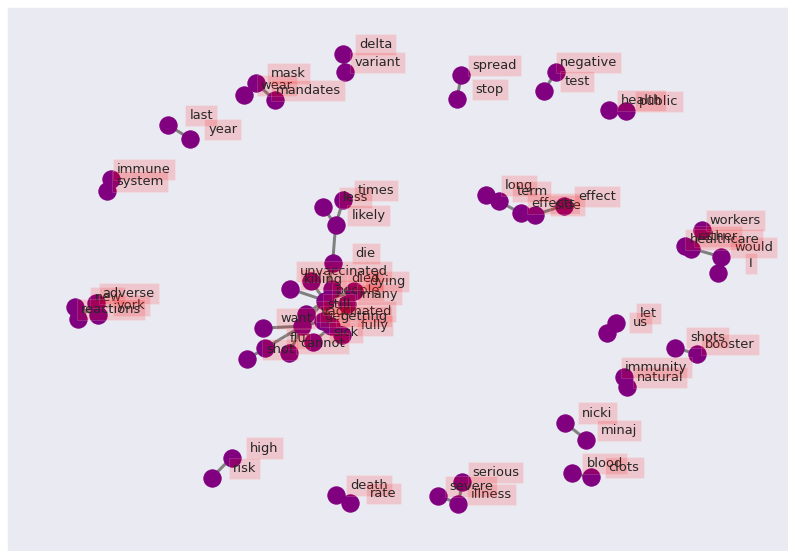

In [ ]:
input_ = 'Negative'
neg = BigramsAnalysis(input_)

In [ ]:
neg

,bigram,count
0,"(side, effects)",9049
1,"(get, vaccinated)",6343
2,"(people, died)",5297
3,"(long, term)",5205
4,"(still, get)",4513
5,"(flu, shot)",4362
6,"(fully, vaccinated)",4219
7,"(vaccinated, people)",4168
8,"(many, people)",3734
9,"(people, get)",3681


In [ ]:
Search("high risk")

729               @awfulsexworker Thank you, I have genetic mutations that put me at high risk for blood clots and Guillain-Barre syndrome, and have been advised not to get #vaccinated (yet). I am actively seeking a protocol to reduce my risks because I want the #CovidVaccine \n\nMuch stigma in being #unvaccinated
1767                                                                                        @TTF_JBeezy @TH_1984_ @Rantoro @TWfan19 Again,  not the case.  I'll try again. \nPt 1. Someone that's never had Covid or a vaccine is at high risk of getting Covid, right?  They have no antibodies and therefore no immunity.
2211                                 I was so relived when the COVID vaccines proved genuinely excellent I naively thought we wouldn’t have wave 4  - but it’s the wave of the unvaccinated, and vaccinated bystanders (in hospital, these are usually partial, recent vaccinees,  high risk). \n1/ https://t.co/YORKETaetZ
2247                                                

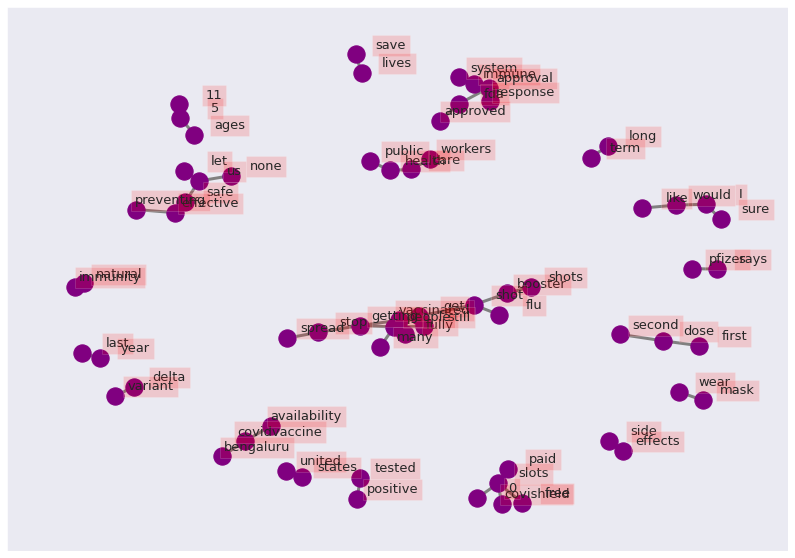

In [ ]:
input_ = 'Positive'
pos = BigramsAnalysis(input_)

In [ ]:
pos

,bigram,count
0,"(natural, immunity)",11248
1,"(get, vaccinated)",6972
2,"(side, effects)",5053
3,"(safe, effective)",4605
4,"(fully, vaccinated)",3877
5,"(immune, system)",3838
6,"(let, us)",3440
7,"(long, term)",3393
8,"(still, get)",3235
9,"(health, care)",3226
